# 泰坦尼克号数据分析  
## 1. 研究问题：  
根据已有数据，选择以下问题进行研究：
- 什么特征会影响最后的生还率  

首先将数据读入并进行简单观察

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('./titanic-data .csv')
print( data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


通过观察数据，进行以下猜测：  
- 女性生还几率高  
- 孩子生还几率高  
- 船舱等级高生还几率高

## 2. 单变量分析  
### 2.1 女性生还几率高  
首先获取数据。

In [2]:
data_sex = data[['Survived', 'Sex']]

之后观察数据:

        Survived
Sex             
female       314
male         577


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E596885860>], dtype=object)

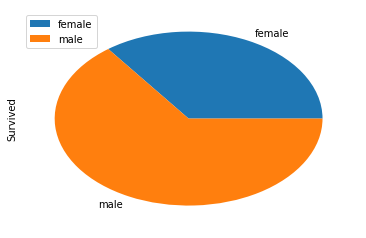

In [3]:
group_sex = data_sex.groupby('Sex')
group_sex_total = group_sex.count()
print( group_sex_total)

%matplotlib inline

group_sex_total.plot(kind='pie', subplots=True)

男女比例差距比较大，女性样本较少，不能直接使用生还人数来作为标准，应该使用生还率。

In [4]:
group_sex_survived = group_sex.sum()
group_sex_survived_ratio = group_sex_survived / group_sex_total
print( group_sex_survived_ratio)

        Survived
Sex             
female  0.742038
male    0.188908


画出图像如下：

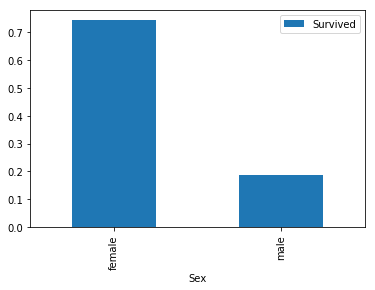

In [5]:
%matplotlib inline

group_sex_survived_ratio.plot(kind='bar')


由此可以得出结论：女性比男性生还率高
### 2.2 小孩生还几率高  
首先获取数据，并对数据的缺失值进行处理，因为缺失的部分对分析结果影响不大，因此可以抛弃。

In [6]:
data_age = data[['Survived', 'Age']].dropna() 

同样的，使用生还率来衡量生还几率，并规定年龄为10岁以下为小孩。对数据进行相应处理：

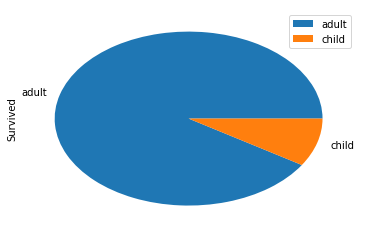

In [7]:
def is_child(age):
    if age <= 10 and age >= 0:
        return 'child'
    else:
        return 'adult'
    
    
data_age['is_child'] = data_age['Age'].map(is_child)
group_children = data_age[['Survived', 'is_child']].groupby('is_child')

%matplotlib inline
group_children_total = group_children.count()
group_children_total.plot(kind='pie', subplots=True)

group_children_survived = group_children.sum()
group_children_survived_ratio = group_children_survived / group_children_total
#print group_children_survived_ratio

可以看到，儿童样本比例较低，样本数量少，画出柱状图如下：

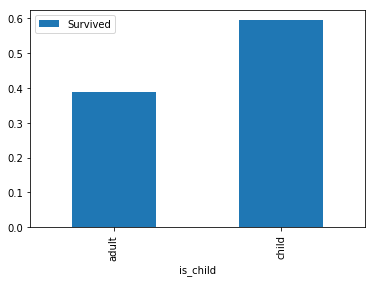

In [15]:
%matplotlib inline

group_children_survived_ratio.plot(kind='bar')

由此可以得到结论：小孩生还率更高  
### 2.3 船舱等级高生还几率高  
首先获取数据。

In [9]:
data_pclass = data[['Survived', 'Pclass']]

同样的，使用生还率来衡量生还几率：

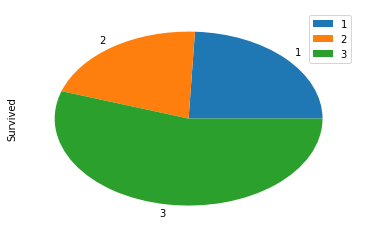

In [10]:
group_pclass = data_pclass.groupby('Pclass')

%matplotlib inline
group_pclass_total = group_pclass.count()
group_pclass_total.plot(kind='pie', subplots=True)

group_pclass_survived = group_pclass.sum()
group_pclass_survived_ratio = group_pclass_survived / group_pclass_total

#print group_pclass_survived_ratio

可以看到，一等船舱和二等船舱的样本数量接近，但是三等船舱的样本数量比其他等级高出很多，画出图像：

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E596F6CDA0>], dtype=object)

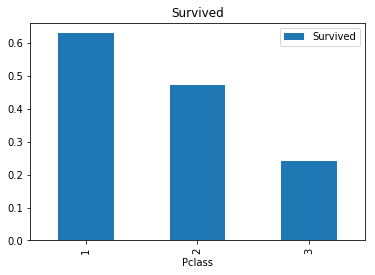

In [11]:
%matplotlib inline

group_pclass_survived_ratio.plot(kind='bar', subplots=True)

可以得出结论：船舱等级越高，生还率越高  
## 3.多变量分析  
### 3.1 性别和船舱等级

               Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347
               Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47


Text(0,0.5,'Survival Rate')

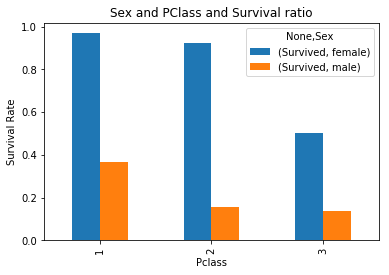

In [12]:
data_pclass_sex = data[['Survived', 'Pclass', 'Sex']]

group_pclass_sex = data_pclass_sex.groupby(['Pclass', 'Sex'])

group_pclass_sex_total = group_pclass_sex.count()
group_pclass_sex_survived = group_pclass_sex.sum()

print(group_pclass_sex_total)
print(group_pclass_sex_survived)

group_pclass_sex_ratio = group_pclass_sex_survived / group_pclass_sex_total
axis_pclass_sex = group_pclass_sex_ratio.unstack().plot(kind='bar')
axis_pclass_sex.set_title('Sex and PClass and Survival ratio')
axis_pclass_sex.set_ylabel('Survival Rate')

可以得到结论：女性的生还率明显高于男性，但是三等船舱的女性生还几率要低于前两个等级；一等船舱的男性生还几率要高于二、三等船舱的男性，但是二、三等船舱的男性生还率没有明显差别。

### 3.2 性别和儿童

                 Survived
is_child Sex             
adult    female       230
         male         420
child    female        31
         male          33
                 Survived
is_child Sex             
adult    female       178
         male          74
child    female        19
         male          19


Text(0,0.5,'Survival Rate')

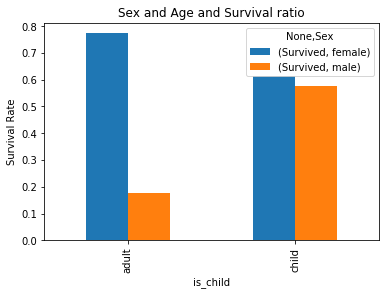

In [13]:
#获取数据，抛弃异常值，并且根据年龄添加‘is_child’关键字来确定是否是儿童
data_age_sex = data[['Survived', 'Age', 'Sex']].dropna()
data_age_sex['is_child'] = data_age_sex['Age'].map(is_child)

#删除'Age'列并计算生还几率
group_age_sex = data_age_sex.drop('Age', axis=1).groupby(['is_child', 'Sex'])
group_age_sex_total = group_age_sex.count()
group_age_sex_survived = group_age_sex.sum()

print(group_age_sex_total)
print( group_age_sex_survived)

group_age_sex_ratio = group_age_sex_survived / group_age_sex_total
axis_age_sex = group_age_sex_ratio.unstack().plot(kind='bar')
axis_age_sex.set_title('Sex and Age and Survival ratio')
axis_age_sex.set_ylabel('Survival Rate')

可以得出结论：女性的生还几率远高于男性，儿童的生还几率高于成人，但是儿童的生还几率不如女性成人，这是由于儿童样本数过少导致的。

### 3.3 儿童和船舱等级

                 Survived
is_child Pclass          
adult    1            183
         2            156
         3            311
child    1              3
         2             17
         3             44
                 Survived
is_child Pclass          
adult    1            120
         2             66
         3             66
child    1              2
         2             17
         3             19


Text(0,0.5,'Survival Rate')

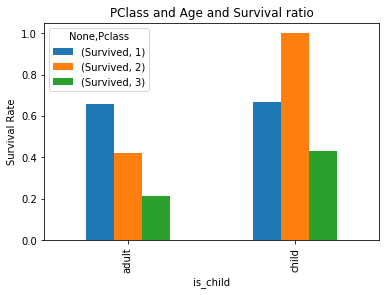

In [14]:
#获取数据，抛弃异常值，并且根据年龄添加‘is_child’关键字来确定是否是儿童
data_age_pclass = data[['Survived', 'Age', 'Pclass']].dropna()
data_age_pclass['is_child'] = data_age_sex['Age'].map(is_child)

#删除'Age'列并计算生还几率
group_age_pclass = data_age_pclass.drop('Age', axis=1).groupby(['is_child', 'Pclass'])
group_age_pclass_total = group_age_pclass.count()
group_age_pclass_survived = group_age_pclass.sum()

print( group_age_pclass_total)
print( group_age_pclass_survived)

group_age_pclass_ratio = group_age_pclass_survived / group_age_pclass_total
axis_age_pclass = group_age_pclass_ratio.unstack().plot(kind='bar')
axis_age_pclass.set_title('PClass and Age and Survival ratio')
axis_age_pclass.set_ylabel('Survival Rate')

可以得到结论：二等船舱的儿童生还率达到100%，高于一等船舱，这应该是由于一等船舱的儿童数量非常少，只有三个，因此一个儿童死亡导致整体生还率下降的非常多；总体说儿童的生还率都比相应船舱等级的成人要高。

## 4 最终结论  
经过上面的分析，可以得到以下结论：
- 女性不论船舱等级，不论是否是儿童，生还率都远高于男性  
- 儿童生还率也相应的高于成人  
- 高级船舱的人生还几率更大  
- 男性的生还几率主要与船舱等级有关，二三等级船舱的男性生还几率最低；而女性的生还几率与船舱等级有一定关系，即使是三等船舱的女性，生还率也比其他人高得多。  

但是本次分析还存在以下问题： 
- 样本有部分缺失  
- 无法判定采样是否随机，样本的分布于真实分布是否一致 
- 样本数量较少
因此，本次分析的结果并不能有效的证明“生还率”与这三个变量有直接关系。
